# Projekt 3
#### Markus Kankkonen

### Del 1
- Gör ljud med kod
- Vi börjar med att importera allt vi behöver för alla delmoment, samt skapar en egen flatten metod för jag e skeptisk mot numpys (den fungerar säkert bra, felet är väl mera på användaren)

In [2]:
# matplotlib image behöver vi för att analysera bilder i del 2-3
import matplotlib.image as img 
# Rita ut fina grafer med pyplot
import matplotlib.pyplot as plt
# Numpy nuf said
import numpy as np
# Write ger oss möjligheten att spara numpy arrays som ljudfiler
from scipy.io.wavfile import write
# Flatten
flatten = lambda f : [item for sublist in f for item in sublist]

- Här kommer logiken för del 1.
- Vi skapar först några ackord med deras hertz värden.
- Sedan skapar vi en stomme för ett ackord i en viss samplerate. 
- Till sist slår vi ihop våra ackord data till en lång lista 

In [23]:

# Här är några olika ackord 
Db7s9 = np.array([293,370,494,698]) # Db7#9 1, dur 3, liten 7, överstigande 9
Db7b9 = np.array([293,370,494,587]) # 1, dur 3, liten 7, förminskad 9
Em7 = np.array([164,392,493,587]) # 1, moll 3, 5, liten 7 
A7 = np.array([220,277,329,392]) # 1, dur 3, 5, liten 7
Dmaj7 = np.array([293,369,440,554]) # 1, dur 3, 5, stor 7
Dmaj7B = np.array([146,369,440,554]) # Dmaj7 med en oktav lägre grund ton

# fs e samplerate
fs = 16000
# Hur långt ett ackord är i sekunder
sec = 2
# Hur många ackord skall våran kadens ha. Dvs. hur lång är våran audio fil
amount = 6

# ett ackord med tids data. vi tar en lista med (sec*sampleraten) mängd värden lineärt från 0 till sec 
oneNote = np.linspace(0,sec,sec*fs,False)

# Vi genererar sinus värden för våra noter 
chords = [ [np.sin(note*oneNote*2*np.pi) for note in chord] for chord in [Db7s9,Db7b9,Em7,A7,Dmaj7,Dmaj7B] ]
# Alla noter slås ihop till ett ackord
# Sedan tar vi flatten för att få dem alla i en lista efter varandra
cadence = np.array(flatten(list(map(lambda chord: (chord[0]+chord[1]+chord[2]+chord[3])/4,chords))))


- Visa våran ljudvåg i ett linjediagram
- Ackordet byter vid 64000
- Använd sedan write från scipy.io.wavfile

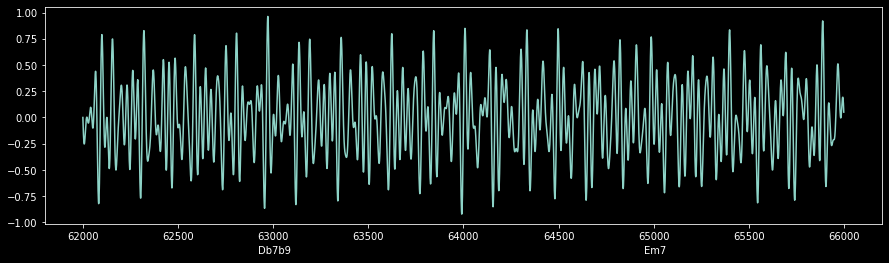

In [26]:

# Visa en liten del av våran ljudvåg med pyplot
plt.figure(figsize=(15,4))
plt.text(x=62920,y=-1.3,s="Db7b9")
plt.text(x=64950,y=-1.3,s="Em7")
plt.plot([n for n in range(62000,66000)],cadence[62000:66000])

# Vi sänker lite på volymen för att inte klippa
volume = 0.7

# Gör en ljudfil av våran data
write("scip.wav",fs,cadence * volume)

### Del 2 
- Pokemon!!!!!
- Läs in data för en bild på en Pokemon
- Visa bilden

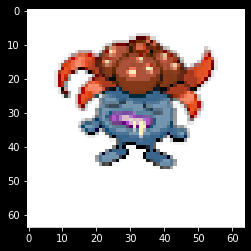

In [4]:
# Läser in våran pokemon bild som data
myPokemon = img.imread("poke.png")
# Konvertera float till int(0-255)
pokemonImg =  np.int_(myPokemon*255)
# Visa bilden med imshow
plt.imshow(pokemonImg)


- Vi delar på datan i olika luminanskanaler röd, grön, blå och visar dem som svartvita


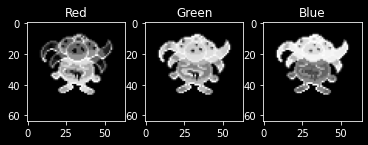

In [5]:
# Figure settings
fig = plt.figure()

# Visa den röda kanalen
a = fig.add_subplot(1,3,1)
a.set_title("Red")
plt.imshow(pokemonImg[:,:,0], cmap="Greys")

# Visa den gröna kanalen
a = fig.add_subplot(1,3,2)
a.set_title("Green")
plt.imshow(pokemonImg[:,:,1], cmap="Greys")

# Visa den blåa kanalen
a = fig.add_subplot(1,3,3)
a.set_title("Blue")
plt.imshow(pokemonImg[:,:,2], cmap="Greys")

- Här slår vi ihop våra luminanskanaler tillbaka till vår ursprunglia pokemon, Wau!
- Detta gick ju lätt med lite numpy magi, dvs. np.dstack

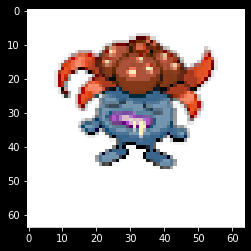

In [27]:
# Slå ihop våra kanaler till en ny bild 
reassembledPokemon = np.dstack([pokemonImg[:,:,0],pokemonImg[:,:,1],pokemonImg[:,:,2]])
# Visa våran nya bild
plt.imshow(reassembledPokemon)

### Del 3
- Vi ska gömma en bild i en annan bild
- Dennis + Fabio

In [17]:
# Vi tar in en bild på Dennis och en på Fabio
dena = img.imread("dennis_small.png")
fabio = img.imread("fabio64.png")

#Vi konvertar från float till int8
denaInt = np.int_(dena*255)
fabioInt = np.int_(fabio*255)

# Vi tar den röda luminanskanalen från dennis bild 
alphaDena = denaInt[:,:,0]
# Normalisera värdet mellan 245 och 255 för att gömma den bättre.
# Utan normalisation skulle man se bilden på den andra
alphaDenaNorm  = np.interp(alphaDena, (alphaDena.min(),alphaDena.max()), (245,255))
# Avrunda värden och konvertera till int
alphaDenaNorm = np.int_(np.round_(alphaDenaNorm,0))

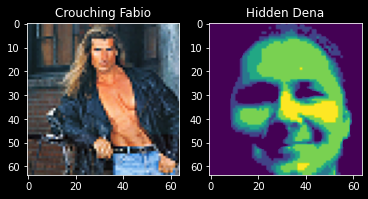

In [18]:
# Här skapar vi en ny bilddata med RGB från fabios bild och alpha kanalen från Dennis bild
denaFabio = np.dstack((fabioInt[:,:,0],fabioInt[:,:,1],fabioInt[:,:,2],alphaDenaNorm))

#Figure settings
fig = plt.figure()
a = fig.add_subplot(1,2,1)
a.set_title("Crouching Fabio")
# Visa hela bilden alla kanaler
plt.imshow(denaFabio)

a = fig.add_subplot(1,2,2)
a.set_title("Hidden Dena")
# Visa ändast alpha kanalen och pixlar med värden mellan 250 och 255 för att få en mera skrämmande Dena
plt.imshow(denaFabio[:,:,3],clim=(250,255))

### Del 3 bonus moment
- Vi skapar ett histogram för våran bild
- Den här funktionen gör livet lättare i följande steg 

In [19]:
# Funktionen tar emot färg värde och räknar varje pixels färgvärde
def getColorValues(df):
    # Vi skapar en tom lista med 255 värden som alla är 0
    clr = [0 for x in range(0,256)]
    # Vi loopar igenom färgdatan och för varje pixel sätter vi till 1 till den matchande färgpositionen i den tomma listan
    for x in df:
        clr[x] = clr[x] +1
    return clr

- Skicka in alla färgkanaler till getColorValues för att få en lista på färgerna 0-255

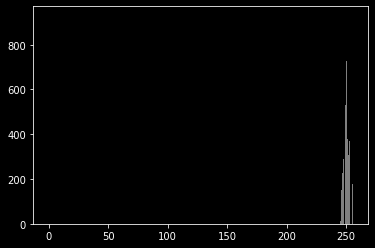

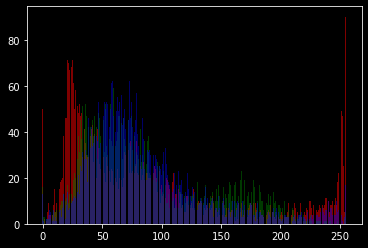

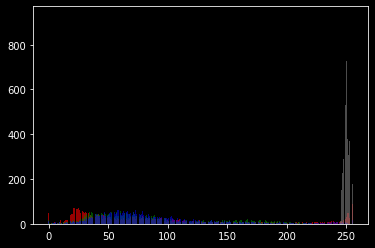

In [22]:

# En iterativ lista från 0-255
scaleList = [x for x in range(0,256)]

# Alla våra kanalers data
alpha =  getColorValues(flatten(denaFabio[:,:,3]))
red =  getColorValues(flatten(denaFabio[:,:,0]))
green = getColorValues(flatten(denaFabio[:,:,1]))
blue = getColorValues(flatten(denaFabio[:,:,2]))

# Visa ändast alpha kanalen
plt.bar(scaleList,alpha, color=["grey"])

plt.show()

# Visa ändast RGB kanalerna
plt.bar(scaleList,red,color=["red"],alpha=0.5)
plt.bar(scaleList,green,color=["green"],alpha=0.45)
plt.bar(scaleList,blue,color=["blue"],alpha=0.4)

plt.show()

# Visa alla 4 kanaler
plt.bar(scaleList,red,color=["red"],alpha=0.6)
plt.bar(scaleList,green,color=["green"],alpha=0.6)
plt.bar(scaleList,blue,color=["blue"],alpha=0.5)
plt.bar(scaleList,alpha,color=["grey"],alpha=0.6)


plt.show()